In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# Read csv and add header
data = pd.read_csv('RadarChuvaJan2021-6d.csv', header=0, names=['day', 'DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV', 'Tp_est'])

In [13]:
# Get all rows where Tp_est != 0
pluvi_df = data.loc[data['Tp_est'] != 0]

## Dataset structure
* total rows: **107,135**
* rows where Tp_est is not *zero*: **13,998** -> data we will use
* rows excluded: **93,137**

### Drop NaN (missing values)
* total rows: **1664**

## Linear Regression

In [17]:
pluvi_df_nan = pluvi_df.dropna()

In [34]:
X = np.array(pluvi_df_nan.drop(['day', 'Tp_est'], axis=1))
y = np.array(pluvi_df_nan['Tp_est'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
predictions = linear_reg.predict(X_test)

In [46]:
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))

3.4016240438572396
0.9787575721792575


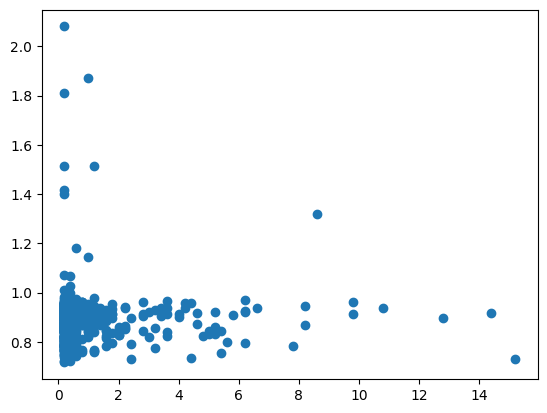

In [40]:
plt.scatter(y_test, predictions)